## Chamada para apenas 1(um) arquivo

In [13]:
import cv2
import requests
import matplotlib.pyplot as plt

In [14]:
BASE_PATH = '/home/italojs/Pictures/docs/'

In [15]:
image = cv2.imread('{}Document 17.jpg'.format(BASE_PATH))
print(image.shape)

(1755, 1104, 3)


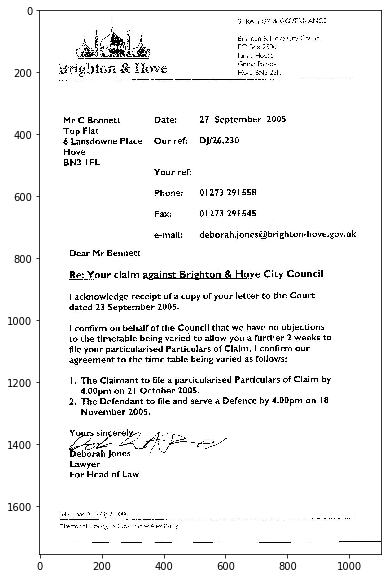

In [16]:
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(image)

In [17]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)

(1755, 1104)


In [18]:
t_y,b_y,l_x  = 310, 380, 490
cropped_image = image[t_y:b_y,l_x:]

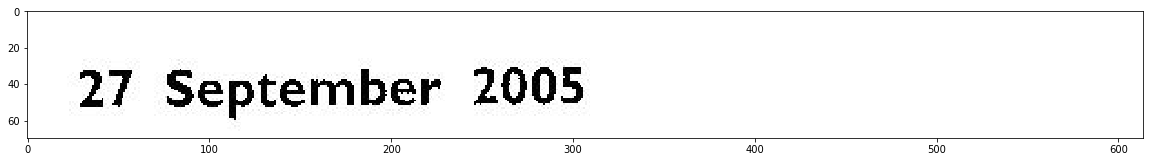

In [19]:
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(cropped_image)

In [20]:
KEY = '6d4c118792804b1097eaaa66b5e3dd92'
visionBaseUrl = 'https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/'
ocrUrl = visionBaseUrl + "ocr"

_, encoded_image = cv2.imencode('.png', cropped_image)
buffer = encoded_image.tobytes()
    
headers = {'Ocp-Apim-Subscription-Key': KEY,
        'Content-Type': 'application/octet-stream'}
params  = {'detectOrientation': 'true'}

try:
    response = requests.post(ocrUrl, headers=headers, params=params, data=buffer)
    response.raise_for_status()

    analysis = response.json()
except Exception as e:
    raise Exception(e)
    

line_infos = [region["lines"] for region in analysis["regions"]]
texts = []
for line in line_infos:
    for wordMetadata in line:
        for wordInfo in wordMetadata["words"]:
            texts.append(wordInfo["text"])

image_name = ' '.join(texts)
cv2.imwrite('{}{}.jpg'.format(BASE_PATH, image_name), image)

True

## Chamada para mais de 1(um) arquivo

In [21]:
import cv2
import glob
import requests

In [22]:
i = 0
BASE_PATH = '/home/italojs/Pictures/docs/'
for path in glob.glob(BASE_PATH +'*.jpg'):
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    t_y,b_y,l_x  = 310, 380, 490
    cropped_image = image[t_y:b_y,l_x:, :]
    
    # converting to buffer
    _, encoded_image = cv2.imencode('.png', cropped_image)
    buffer = encoded_image.tobytes()
    
    KEY = '6d4c118792804b1097eaaa66b5e3dd92'
    visionBaseUrl = 'https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/'
    ocrUrl = visionBaseUrl + "ocr"


    headers = {'Ocp-Apim-Subscription-Key': KEY,
               'Content-Type': 'application/octet-stream'}
    params  = {'detectOrientation': 'true'}

    try:
        response = requests.post(ocrUrl, headers=headers, params=params, data=buffer)
        response.raise_for_status()

        analysis = response.json()
    except Exception as e:
        raise Exception(e)


    line_infos = [region["lines"] for region in analysis["regions"]]
    texts = []
    for line in line_infos:
        for wordMetadata in line:
            for wordInfo in wordMetadata["words"]:
                texts.append(wordInfo["text"])

    i = i+1
    image_name = ' '.join(texts)
    cv2.imwrite('{}renamed/{}({}).jpg'.format(BASE_PATH, image_name, i), image)